<a href="https://colab.research.google.com/github/yoohyunseok/Machine-Learnig-Deep-Learning/blob/main/7_3%EC%8B%A0%EA%B2%BD%EB%A7%9D%EB%AA%A8%EB%8D%B8%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from tensorflow import keras #keras 패키지
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data() #패션 MNIST 데이터셋 다운로드
#load_data() 메서드는 훈련 세트와 테스트 세트를 나누어 반환
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [15]:
#모델 만드는 함수
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer) #model_fn 함수에 (a_layer매개변수로) 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가하는 것
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  return model
#if 구문 빼면 이전에 만든 모델과 동일함
'''
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28))) #input_shape 매개 변수를 Flatten 층으로 옮김
model.add(keras.layers.Dense(100, activation = 'relu')) # 활성화 함수를 relu로 바꿈model.add(keras.layers.Dense(10, activation = 'softmax'))
'''

"\nmodel = keras.Sequential()\nmodel.add(keras.layers.Flatten(input_shape = (28, 28))) #input_shape 매개 변수를 Flatten 층으로 옮김\nmodel.add(keras.layers.Dense(100, activation = 'relu')) # 활성화 함수를 relu로 바꿈model.add(keras.layers.Dense(10, activation = 'softmax'))\n"

In [16]:
model = model_fn()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
#fit() 메서드의 결과를 history에 저장
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)#verbose 매개변수는 훈련 과정 출력을 조절합니다. 기본 값 = 1
#verbose = 1 => 이전 절 에서처럼 에포크마다 진행 막대와 함께 손실, 정확도 등 지표 출력
#verbose = 2 => 진행 막대만 빼고 똑같이 출력
#verbose = 0 => 훈련 과정 출력 X

In [18]:
#history 객체에는 훈련 측정 값이 담겨있는 history 딕셔너리가 존재함
print(history.history.keys()) #history 딕셔너리의 key 값 출력

dict_keys(['accuracy', 'loss'])


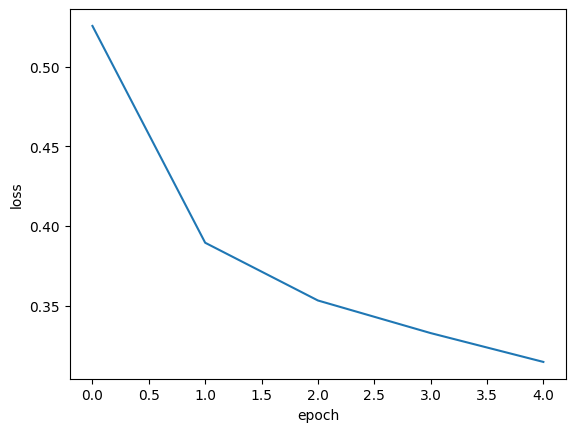

In [19]:
#손실 그래프
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

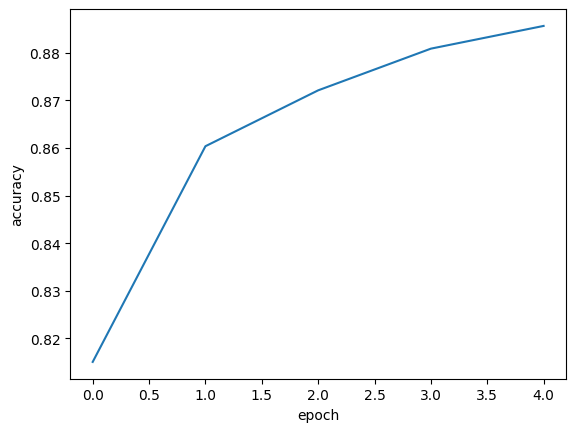

In [20]:
#정확도 그래프
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

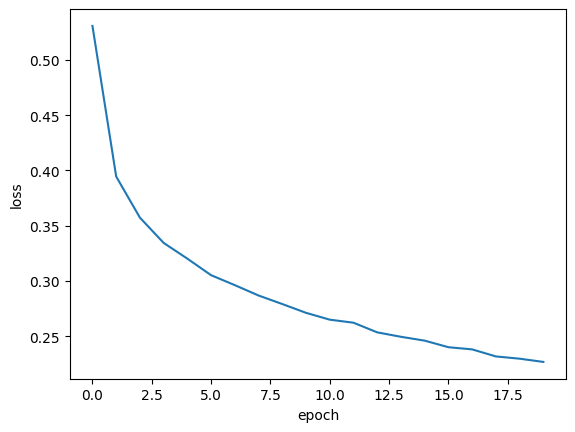

In [21]:
#epoch 20으로 늘려서 모델 훈련 후 손실 그래프
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose = 0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 검증 손실
- 4장에서 SGD를 사용했을 때 과대/과소 적합과 epochs 사이의 관계를 알아봤었음
- 인공 신경망은 모두 일종의 경사하강법을 사용하기 때문에 여기서도 동일한 개념이 적용됨!
- 훈련 세트와 검증 세트에 대한 손실을 사용하여 과대/과소 적합을 다룸

In [22]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target), verbose = 0) #validation_data 매개변수에 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달

In [23]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


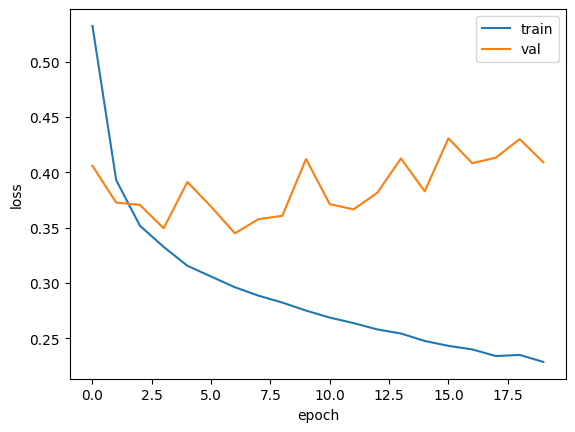

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

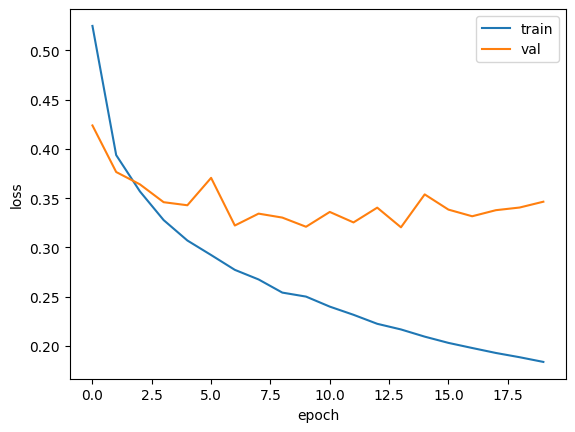

In [26]:
#RMSprop 대신 adam을 사용해서 과대적합 완화
model = model_fn()
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target), verbose = 0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 드롭 아웃(drop out)
- 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(뉴런의 출력을 0으로 만들어) 과대적합을 막는다.
- 뉴런은 랜덤하게 드롭 아웃되며, 얼마나 많은 뉴런을 드롭 아웃할지는 우리가 정해야 할 하이퍼 파라미터이다.
- 드롭 아웃은 왜 과대 적합을 막을까?
  - 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야한다.
- 드롭 아웃 할 비율을 r 이라고 했을 때 드롭아웃 하지 않는 뉴럽의 출력은 1/(1-r)만큼 증가시켜 출력의 총합이 같도록 만든다.

In [27]:
model = model_fn(keras.layers.Dropout(0.3)) #뉴런의 30% 정도 드롭 아웃시키는 드롭 아웃 층 추가
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

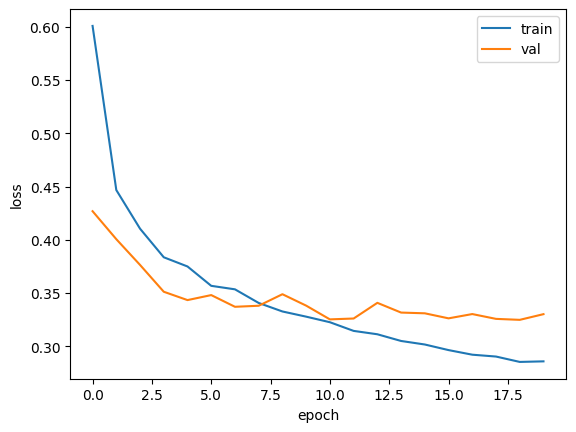

In [28]:
#드롭 아웃을 통해 과대 적합 완화
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target), verbose = 0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 모델의 저장과 복원

In [29]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target), verbose = 0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
#save_weights(): 훈련된 모델의 파라미터를 저장한다.
# 기본적으로 텐서플로의 체크포인트 포맷으로 저장하지만 파일의 확장자가 '.h5'일 경우 HDF5 포맷으로 저장한다.
model.save_weights('model-weights.weights.h5')
#파일 이름이 .weights.h5로 끝나야해서 책이랑 다르지만 이렇게 파일 이름을 지음

In [36]:
#save(): 모델 구조와 모델 파라미터를 함께 저장한다.
# 기본적으로 텐서플로의 SavedModel 포맷으로 저장하지만 파일의 확장자가 '.h5'일 경우 HDF5 포맷으로 저장한다.
model.save('model-whole.h5')

In [37]:
!ls -al *.h5 #두 파일이 잘 만들어졌는지 확인

-rw-r--r-- 1 root root 976600 Mar  1 13:06 model-weights.weights.h5
-rw-r--r-- 1 root root 978584 Mar  1 13:06 model-whole.h5


훈련을 하지 않은 새로운 모델을 만들고 model-weights.weights.h5에서 훈련된 모델 파라미터 읽어서 사용하기 vs model-whole.h5 파일에서 새로운 모델을 만들어 바로 사용하기

In [41]:
#전자
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.weights.h5') #load_weights(): 모든 층의 가중치와 절편을 파일에서 읽는다.
#load_wights()를 사용할려면 save_weights()로 저장했던 모델과 정확히 같은 구조를 가져야 한다.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
import numpy as np
#predict 메서드는 사이킷런과 달리 샘플마다 10개의 클래스에 대한 확률을 반환
#validation set의 샘플 개수는 12,000개이기 때문에 predict()는 (12000, 10)크기의 배열을 반환
val_labels = np.argmax(model.predict(val_scaled), axis = -1) #argmax()함수를 사용해서 10개 확률 중 가장 큰 값의 인덱스를 골라서 반환
#argmax()의 axis = -1은 배열의 마지막 차원을 따라 최댓값을 고릅니다. validation set는 2차원 배열이기 때문에 마지막 차원을 1이 됩니다.
print(np.mean(val_labels == val_target)) #argmax()로 고른 인덱스와 타깃을 비교합니다. 두 배열에서 각 위치의 값이 같으면 1, 다르면 0이 됩니다.
# 이를 평균하면 정확도가 됩니다.

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.88225


In [43]:
#후자
model = keras.models.load_model('model-whole.h5') #load_model(): model.save()로 저장된 모델을 로드한다.
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8859 - loss: 0.3241


[0.32982155680656433, 0.8822500109672546]

전자와 후자 모두 같은 모델이라서 동일한 정확도가 나옴

# 콜 백(call back)
- 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
- fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용
- 여기서 사용할 ModelCheckpoint 콜백은 기본적으로 에포크마다 모델을 저장
- save_best_only = True 매개변수 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장

In [44]:
# monitor 매개변수는 모니터링할 지표를 지정(기본 값 = 'val_loss')
# save_weights_only 매개변수의 기본 값은 False로 전체 모델을 저장한다. True로 지정하면 모델의 가중치와 절편만 저장한다.
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)
model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb])
#best-model.h5에 최상의 검증 점수를 낸 모델이 저장

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8916 - loss: 0.3095


[0.3119193911552429, 0.8889999985694885]

ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 저장해서 편하긴 하지만 여전히 20 epochs동안 훈련을함..사실 검증 점수가 상승하기 시작하면 그 이후에는 과대적합이 더 커지기 때문에 훈련을 계속할 필요X

이때 훈련을 중지하면 컴퓨터의 자원과 시간을 아낄 수 있다.

# 이렇게 과대적합이 시작되기 전에 훈련을 미리 중지하는 것을 ***조기종료***라고 부른다.

In [49]:
#EarlyStopping콜백과 ModelCheckpoint 콜백 같이 사용
#patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수 지정
# ex) patience = 2로 지정하면 2번 연속 검증 점수가 오르지 않을경우 훈련 중지
# monitor 매개변수는 모니터링 할 지표를 지정(기본 값 = 'val_loss')
# restore_best_weights 매개변수를 True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
print(early_stopping_cb.stopped_epoch)#훈련이 중지된 epoch

14


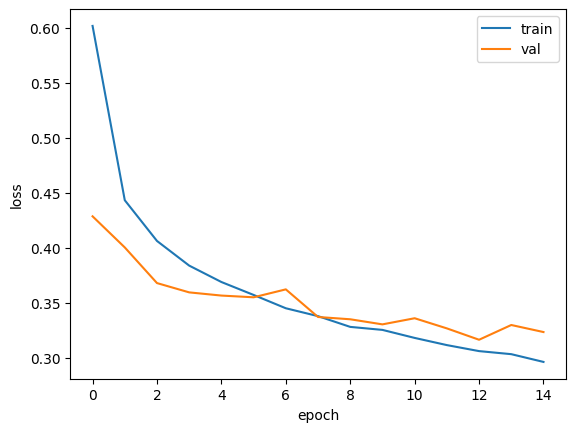

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
#epoch 횟수는 0부터 시작하기 때문에, 15 번째 epoch에서 훈련이 중지되었음을 의미. patience = 2로 지정했으므로 최적의 모델은 13 번째 epoch이다.

In [52]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8896 - loss: 0.3136


[0.3166220188140869, 0.8856666684150696]